In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Import data file 
df = pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [7]:
#DATA CLEANING
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [9]:
df.drop(['Status','unnamed1'], axis=1, inplace= True)

In [10]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [16]:
df.dropna(inplace= True)

In [17]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [22]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610858
std,12.753866,1.114967,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [25]:
df['Amount'].dtype

dtype('float64')

In [29]:
df['Amount']= df['Amount'].astype('int')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


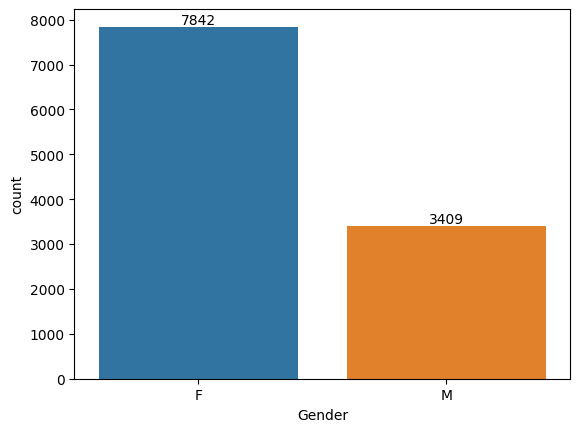

In [15]:
#Which gender is buying more
import seaborn as sns
import pandas as pd
df = pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')
a = sns.countplot(x='Gender',data=df,hue='Gender')
for bars in a.containers:
    a.bar_label(bars)

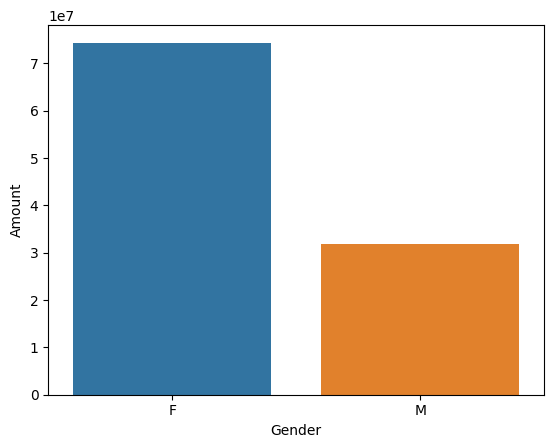

In [30]:
sales_gen = df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(['Amount'],ascending=False)
b = sns.barplot(x='Gender',y= 'Amount',data=sales_gen,hue='Gender')



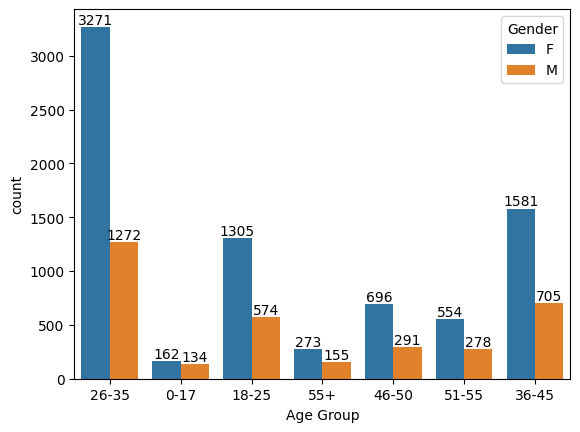

In [35]:
#Sales as per Age group

-c = sns.countplot(x= 'Age Group',data= df,hue = 'Gender')
for bars in c.containers:
    c.bar_label(bars)

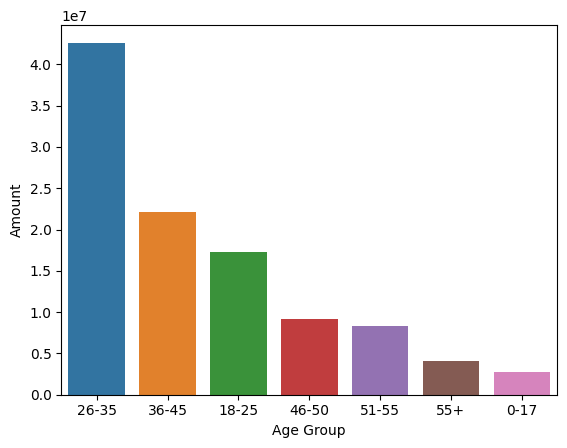

In [41]:
sales_age = df.groupby(['Age Group'],as_index= False)['Amount'].sum().sort_values(['Amount'],ascending= False)
ax = sns.barplot(x = 'Age Group',y = 'Amount',data = sales_age,hue = 'Age Group')

Text(0.5, 1.0, 'Sales by State')

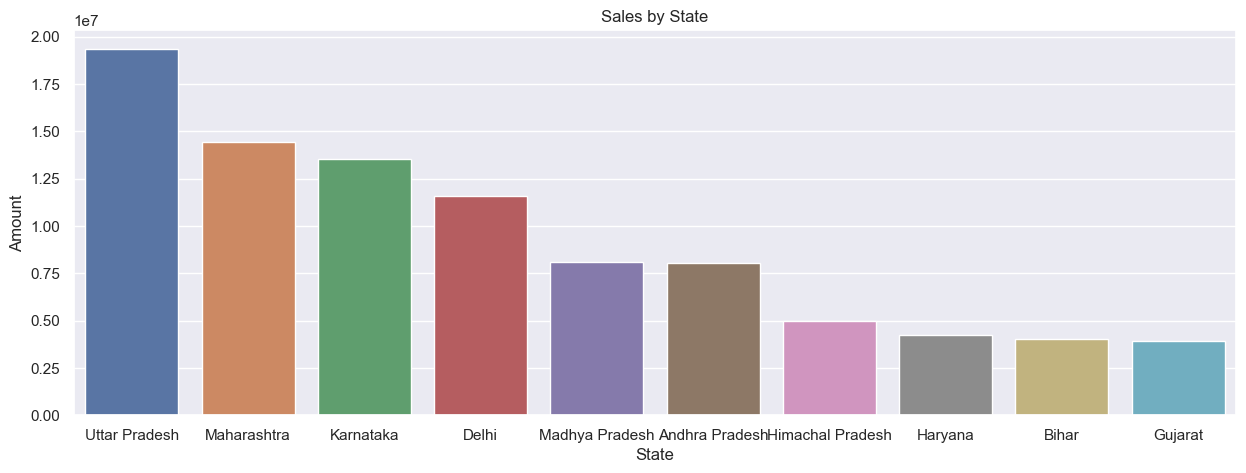

In [16]:
#Sales by State
import seaborn as sns
import pandas as pd
df = pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')
sales_state= df.groupby(['State'],as_index= False)['Amount'].sum().sort_values(['Amount'],ascending= False).head(10)
sns.set(rc={'figure.figsize' : (15,5)})
y = sns.barplot(x = 'State',y = 'Amount',data=sales_state,hue = 'State')
y.set_title('Sales by State')

Text(0.5, 1.0, 'Sales by Occupation')

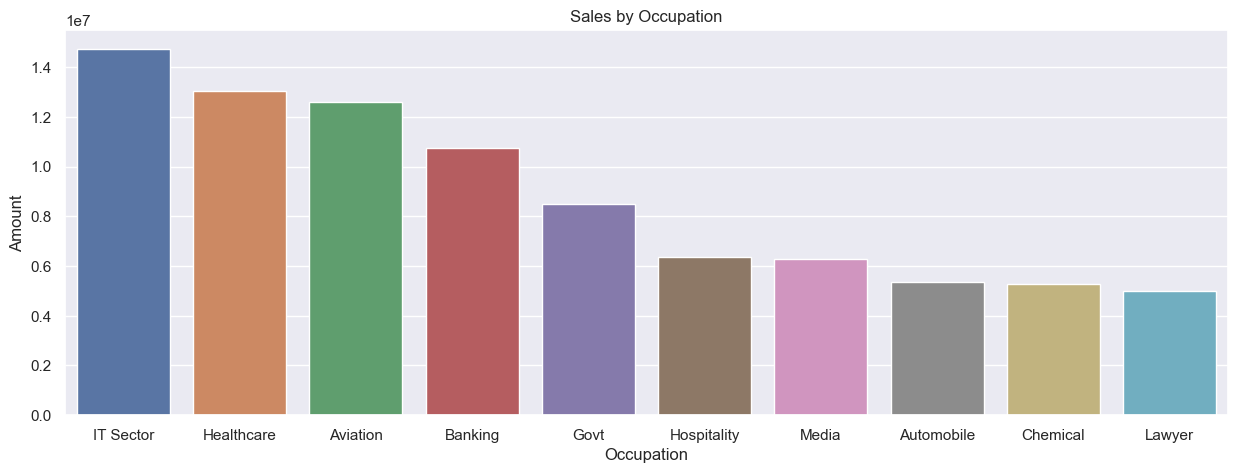

In [20]:
#Sales by Occupation
Occu = df.groupby(['Occupation'],as_index= False)['Amount'].sum().sort_values(['Amount'],ascending= False).head(10)
sns.set(rc={'figure.figsize' : (15,5)})
y = sns.barplot(x = 'Occupation',y = 'Amount',data=Occu,hue='Occupation')
y.set_title('Sales by Occupation')